    Brief description of the data set and a summary of its attributes-

    The following dataset used titled 'IBM HR Analytics dataset' it 

Initial plan for data exploration
    Loading the data into the workspace
    Removing outlier
    Fixing Null values
    Creating plots to get intial insights from data

Actions taken for data cleaning and feature engineering

Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner

Formulating at least 3 hypothesis about this data

Conducting a formal significance test for one of the hypotheses and discuss the results 

Suggestions for next steps in analyzing this data

A paragraph that summarizes the quality of this data set and a request for additional data if needed

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset

  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 4.44MB/s]


In [4]:
!unzip stroke-prediction-dataset.zip


Archive:  stroke-prediction-dataset.zip
  inflating: healthcare-dataset-stroke-data.csv  


In [5]:
%matplotlib inline
#Importing required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
path='/content/healthcare-dataset-stroke-data.csv'
df=pd.read_csv(path)
df.head()
type(df)

pandas.core.frame.DataFrame

In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.info
print(type(df),df.info)

<class 'pandas.core.frame.DataFrame'> <bound method DataFrame.info of          id  gender   age  ...   bmi   smoking_status stroke
0      9046    Male  67.0  ...  36.6  formerly smoked      1
1     51676  Female  61.0  ...   NaN     never smoked      1
2     31112    Male  80.0  ...  32.5     never smoked      1
3     60182  Female  49.0  ...  34.4           smokes      1
4      1665  Female  79.0  ...  24.0     never smoked      1
...     ...     ...   ...  ...   ...              ...    ...
5105  18234  Female  80.0  ...   NaN     never smoked      0
5106  44873  Female  81.0  ...  40.0     never smoked      0
5107  19723  Female  35.0  ...  30.6     never smoked      0
5108  37544    Male  51.0  ...  25.6  formerly smoked      0
5109  44679  Female  44.0  ...  26.2          Unknown      0

[5110 rows x 12 columns]>


In [9]:
print(df.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [10]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [11]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [12]:
df.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [13]:
df=df.dropna()
df.head()
df.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [14]:
for col in ['hypertension','heart_disease','stroke']:
  df[col]=df[col].replace([0,1],['NO','YES'])
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,NO,YES,Yes,Private,Urban,228.69,36.6,formerly smoked,YES
2,31112,Male,80.0,NO,YES,Yes,Private,Rural,105.92,32.5,never smoked,YES
3,60182,Female,49.0,NO,NO,Yes,Private,Urban,171.23,34.4,smokes,YES
4,1665,Female,79.0,YES,NO,Yes,Self-employed,Rural,174.12,24.0,never smoked,YES
5,56669,Male,81.0,NO,NO,Yes,Private,Urban,186.21,29.0,formerly smoked,YES
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,NO,NO,No,children,Rural,103.08,18.6,Unknown,NO
5106,44873,Female,81.0,NO,NO,Yes,Self-employed,Urban,125.20,40.0,never smoked,NO
5107,19723,Female,35.0,NO,NO,Yes,Self-employed,Rural,82.99,30.6,never smoked,NO
5108,37544,Male,51.0,NO,NO,Yes,Private,Rural,166.29,25.6,formerly smoked,NO


In [15]:
#Target %
strokes= df[(df['stroke'] == "YES")] 
no_strokes=df[(df['stroke'] == "NO")]
print(len(strokes))
len(no_strokes)

209


4700

In [16]:
df.drop_duplicates()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,NO,YES,Yes,Private,Urban,228.69,36.6,formerly smoked,YES
2,31112,Male,80.0,NO,YES,Yes,Private,Rural,105.92,32.5,never smoked,YES
3,60182,Female,49.0,NO,NO,Yes,Private,Urban,171.23,34.4,smokes,YES
4,1665,Female,79.0,YES,NO,Yes,Self-employed,Rural,174.12,24.0,never smoked,YES
5,56669,Male,81.0,NO,NO,Yes,Private,Urban,186.21,29.0,formerly smoked,YES
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,NO,NO,No,children,Rural,103.08,18.6,Unknown,NO
5106,44873,Female,81.0,NO,NO,Yes,Self-employed,Urban,125.20,40.0,never smoked,NO
5107,19723,Female,35.0,NO,NO,Yes,Self-employed,Rural,82.99,30.6,never smoked,NO
5108,37544,Male,51.0,NO,NO,Yes,Private,Rural,166.29,25.6,formerly smoked,NO


In [17]:
categorical_cols=[]
numeric_cols=[]
for x in df.columns:
  if df[x].dtype=='object':
    categorical_cols.append(x)
  else:
    numeric_cols.append(x)
print(categorical_cols)

print(numeric_cols)

['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
['id', 'age', 'avg_glucose_level', 'bmi']


In [18]:
type(df)

pandas.core.frame.DataFrame

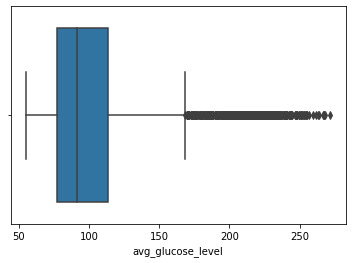

In [ ]:
#Detecting outliers
sns.boxplot(x=df['avg_glucose_level'])

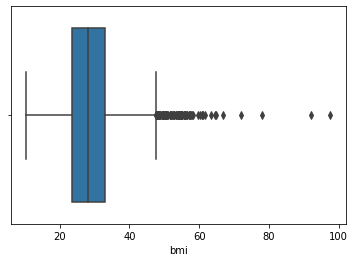

In [ ]:
sns.boxplot(x=df['bmi'])

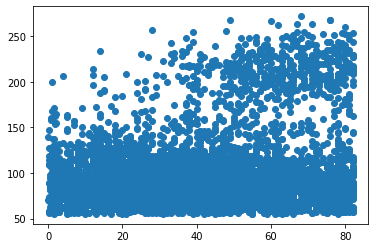

In [ ]:
#scatter plot
ax=plt.axes()
plt.scatter(df.age,df.avg_glucose_level)

(array([189., 204., 220., 278., 322., 368., 382., 347., 334., 298., 246.,
        203., 190., 176., 104., 102.,  73.,  50.,  44.,  41.,  45.,  31.,
         29.,  24.,  23.,  16.,  15.,  18.,  14.,  20.,  20.,  28.,  45.,
         45.,  51.,  39.,  32.,  48.,  41.,  32.,  33.,  25.,  18.,  12.,
         11.,   9.,   5.,   2.,   3.,   4.]),
 array([ 55.12  ,  59.4524,  63.7848,  68.1172,  72.4496,  76.782 ,
         81.1144,  85.4468,  89.7792,  94.1116,  98.444 , 102.7764,
        107.1088, 111.4412, 115.7736, 120.106 , 124.4384, 128.7708,
        133.1032, 137.4356, 141.768 , 146.1004, 150.4328, 154.7652,
        159.0976, 163.43  , 167.7624, 172.0948, 176.4272, 180.7596,
        185.092 , 189.4244, 193.7568, 198.0892, 202.4216, 206.754 ,
        211.0864, 215.4188, 219.7512, 224.0836, 228.416 , 232.7484,
        237.0808, 241.4132, 245.7456, 250.078 , 254.4104, 258.7428,
        263.0752, 267.4076, 271.74  ]),
 <a list of 50 Patch objects>)

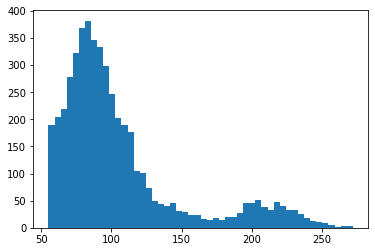

In [ ]:
plt.hist(df.avg_glucose_level,bins=50)

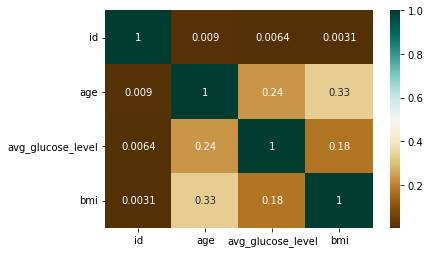

In [ ]:
c=df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

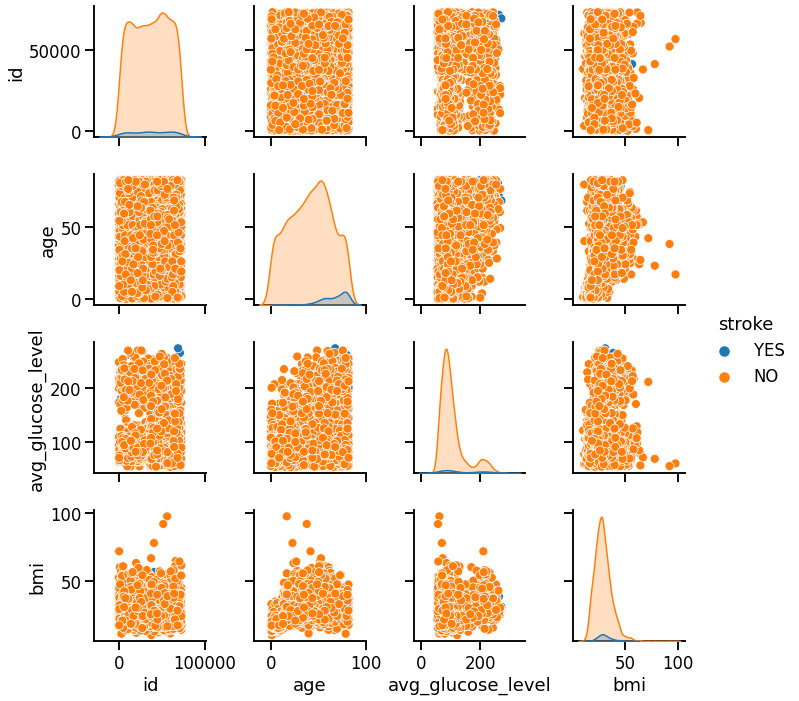

In [ ]:
sns.set_context('talk')
sns.pairplot(df,hue='stroke')

In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,NO,YES,Yes,Private,Urban,228.69,36.6,formerly smoked,YES
2,Male,80.0,NO,YES,Yes,Private,Rural,105.92,32.5,never smoked,YES
3,Female,49.0,NO,NO,Yes,Private,Urban,171.23,34.4,smokes,YES
4,Female,79.0,YES,NO,Yes,Self-employed,Rural,174.12,24.0,never smoked,YES
5,Male,81.0,NO,NO,Yes,Private,Urban,186.21,29.0,formerly smoked,YES
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,NO,NO,No,children,Rural,103.08,18.6,Unknown,NO
5106,Female,81.0,NO,NO,Yes,Self-employed,Urban,125.20,40.0,never smoked,NO
5107,Female,35.0,NO,NO,Yes,Self-employed,Rural,82.99,30.6,never smoked,NO
5108,Male,51.0,NO,NO,Yes,Private,Rural,166.29,25.6,formerly smoked,NO


In [ ]:
def bar_plot(data,x,y='id',hue='stroke',group='stroke' ,title=None):
    """
        function use to plot barplot by grouping the data

    """
    try:
        group=data.groupby([x,group],as_index=False)['id'].count()
        sns.barplot(data=group,x=x,y=y,hue=hue,)
        plt.title("Stroke count based on "+ x , fontdict={'size' :16,'color':'orange'})
        plt.ylabel('Count',fontdict={'size':20,'color':'blue'})
        plt.xlabel(x,fontdict={'size':8,'color':'blue'})
        print('-'*100)
        return display(group) ,plt.show()
    except:
        pass

----------------------------------------------------------------------------------------------------


,gender,stroke,id
0,Female,NO,2777
1,Female,YES,120
2,Male,NO,1922
3,Male,YES,89
4,Other,NO,1


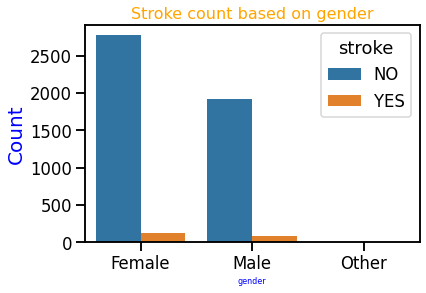

----------------------------------------------------------------------------------------------------


,hypertension,stroke,id
0,NO,NO,4309
1,NO,YES,149
2,YES,NO,391
3,YES,YES,60


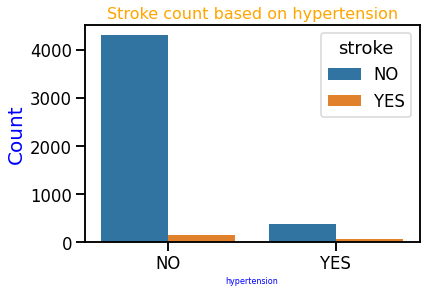

----------------------------------------------------------------------------------------------------


,heart_disease,stroke,id
0,NO,NO,4497
1,NO,YES,169
2,YES,NO,203
3,YES,YES,40


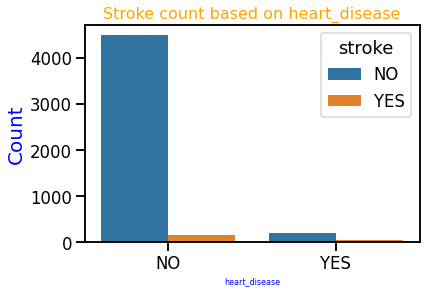

----------------------------------------------------------------------------------------------------


,ever_married,stroke,id
0,No,NO,1682
1,No,YES,23
2,Yes,NO,3018
3,Yes,YES,186


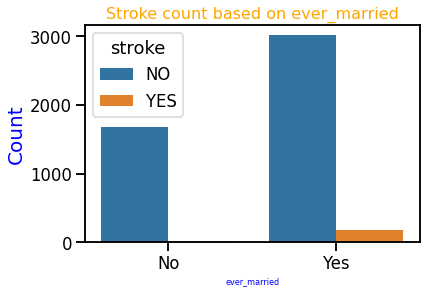

----------------------------------------------------------------------------------------------------


,work_type,stroke,id
0,Govt_job,NO,602
1,Govt_job,YES,28
2,Never_worked,NO,22
3,Private,NO,2684
4,Private,YES,127
5,Self-employed,NO,722
6,Self-employed,YES,53
7,children,NO,670
8,children,YES,1


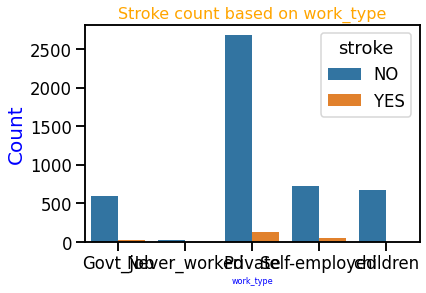

----------------------------------------------------------------------------------------------------


,Residence_type,stroke,id
0,Rural,NO,2319
1,Rural,YES,100
2,Urban,NO,2381
3,Urban,YES,109


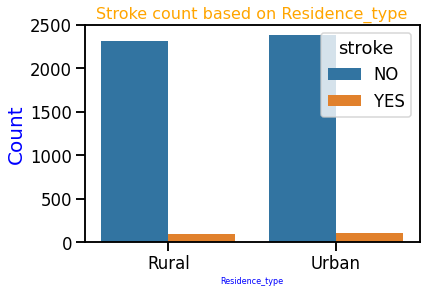

----------------------------------------------------------------------------------------------------


,smoking_status,stroke,id
0,Unknown,NO,1454
1,Unknown,YES,29
2,formerly smoked,NO,780
3,formerly smoked,YES,57
4,never smoked,NO,1768
5,never smoked,YES,84
6,smokes,NO,698
7,smokes,YES,39


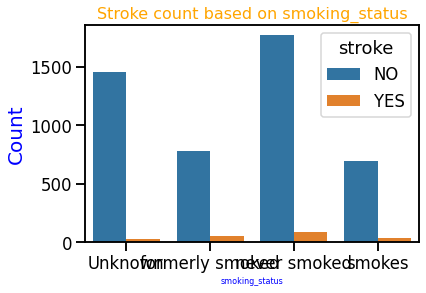

In [ ]:
for col in categorical_cols:
    bar_plot(df,col)

In [ ]:
def scatter_graph(data,x,y='stroke',title=None):
  sns.scatterplot(data=df,x=x,y=y)
  plt.title("Relationship between "+x+" and "+y)
  print('-'*100*2)
  return plt.show()
  

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


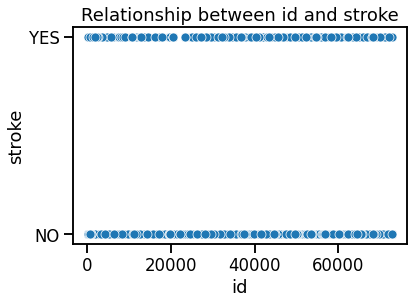

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


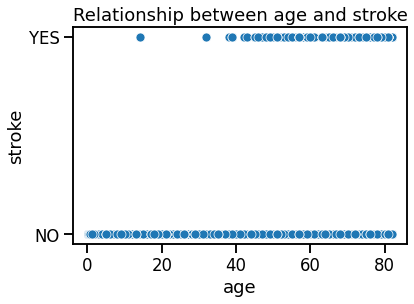

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


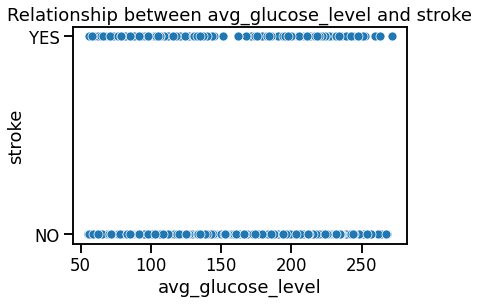

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


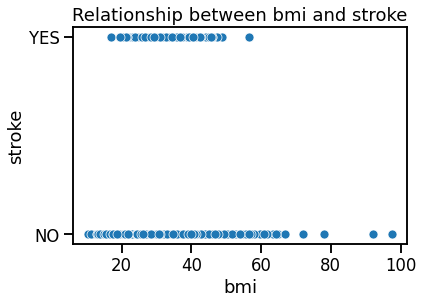

In [ ]:
for cols in numeric_cols:
  scatter_graph(df,cols)

#Observations

> Age is statistically related to having stroke i.e. more the age more prone you are to get a stroke.

> People in the bmi range of 20 to 40 are most susceptible to stroke.

> Residance area is also statistically related to stroke.






#Hypothesis Testing
For age
  
  Null- People above the age of 45 and above are prone to stroke
  
  Alternate - Not prone to stroke

  Alpha=0.01

For Average glucose level

  Null- People having average glucose levels between 150-160 are less prone to strokes.

  Alternate-There's no such thing

  Alpha=0.01

For bmi

  Null- People with bmi in range of 20-40 are more prone to stroke.

  Alternate- There's no such thing everyone is prone to stroke. 

  Alpha = 0.01

For area

  Null- People living in urban areas are prone to stroke.

  Alternate- People living in urban areas are not prone to stroke.

  Alpha = 0.01

In [19]:
import scipy as sp

In [20]:
strokes_df = df[df['stroke'] == "YES"]
no_strokes_df = df[df['stroke'] == "NO"]

In [31]:
sp.stats.shapiro(strokes_df['Residence_type'] == "Urban")

(0.6357665061950684, 6.935258354642178e-21)

In [32]:
sp.stats.ttest_ind(strokes_df['Residence_type'] == "Urban",no_strokes_df['Residence_type'] == "Urban",equal_var=False)

Ttest_indResult(statistic=0.4219485281326302, pvalue=0.6734622116386637)

Alpha = 0.01

p value=0.67

Since pvalue > alpha 

we fail to reject the null hypothesis which means yes urban people are more prone to have a stroke.

So there seems to be a statistical relationship between Residance area and heart stroke.



